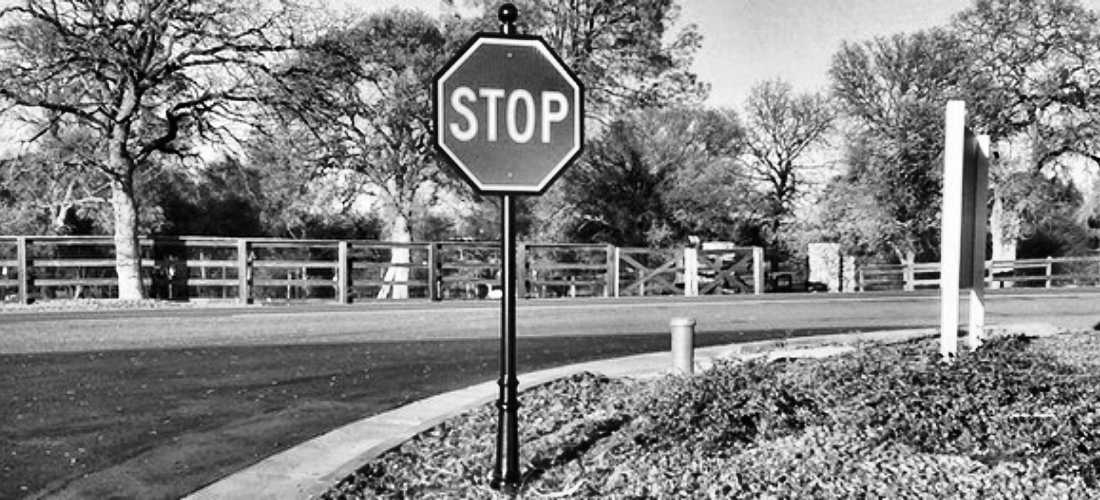

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

frame = cv2.imread("/content/ts1.png")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray)

cv2_imshow(cl1) # Display the CLAHE enhanced image

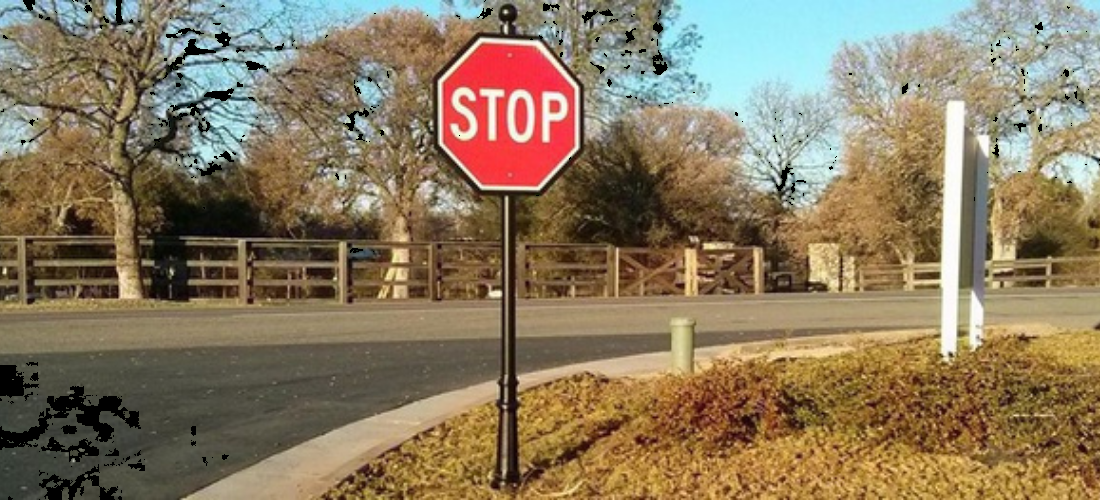

In [ ]:
#Step 2 Remove green color in HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
lower_green = np.array([35,40,40])
upper_green = np.array([85,255,255])
mask = cv2.inRange(hsv, lower_green, upper_green)
result = cv2.bitwise_and(frame, frame, mask=~mask)
cv2_imshow(result)

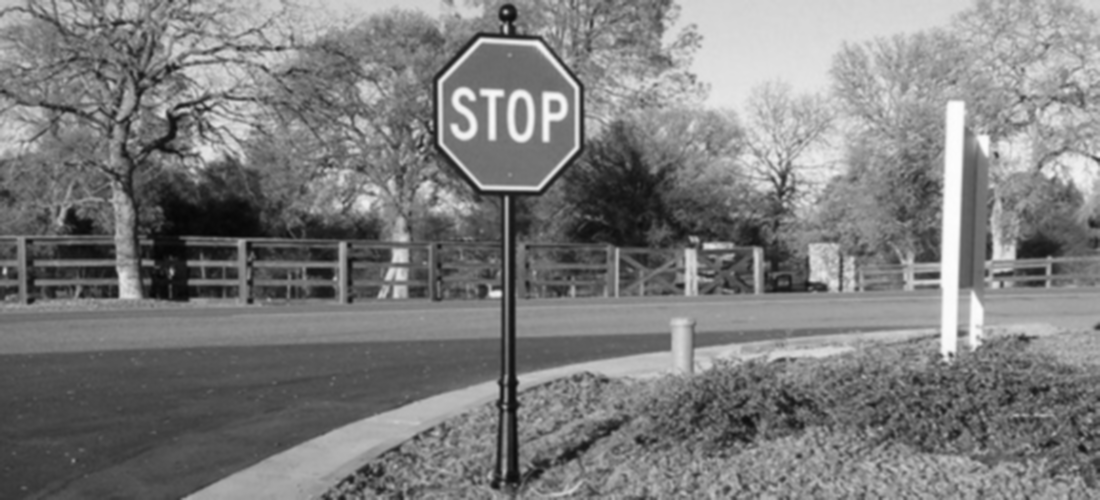

In [ ]:
blurred  = cv2.GaussianBlur(gray,(5,5),0)
cv2_imshow(blurred)

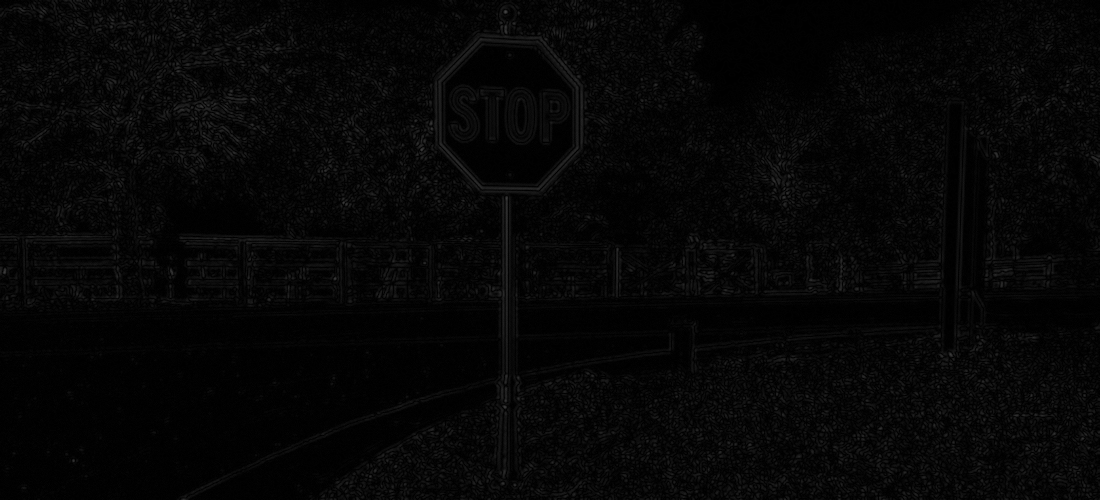

In [ ]:
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))
cv2_imshow(laplacian)

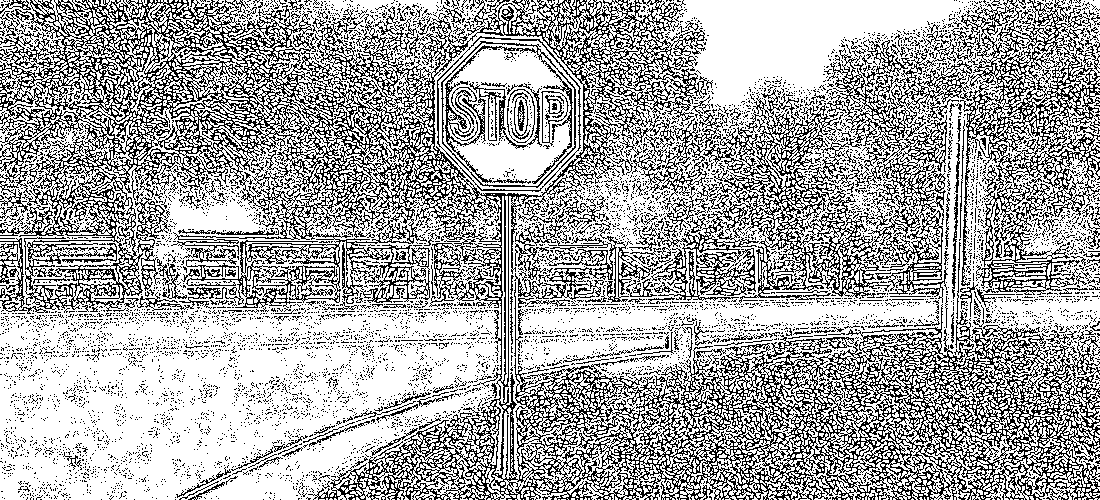

In [ ]:
binary = cv2.adaptiveThreshold(laplacian, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
cv2_imshow(binary)
#

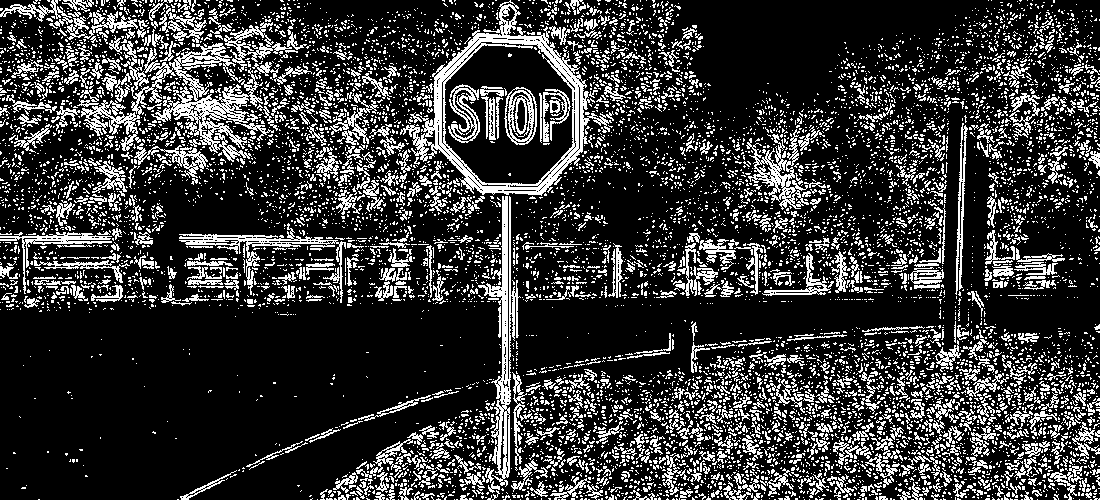

In [ ]:
binary = cv2.threshold(laplacian, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
cv2_imshow(binary)
#

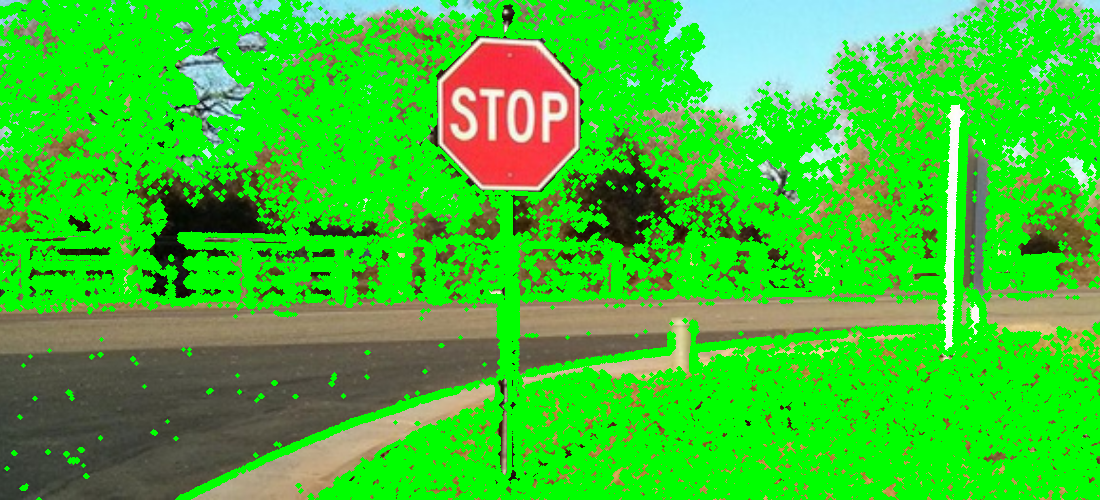

In [ ]:
contours,_ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(frame, contours, -1, (0,255,0), 3)
cv2_imshow(frame)

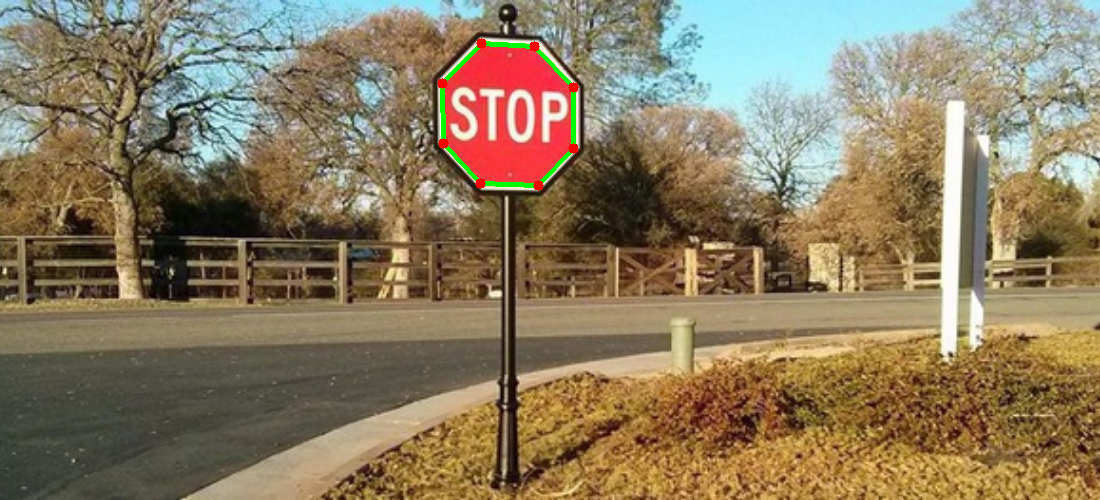

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use for Google Colab

# Load the image
image = cv2.imread("ts1.png")
original = image.copy()  # Keep a copy for reference

# Convert BGR to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define HSV range for red traffic signs (fine-tune for your image)
lower_red1 = np.array([0, 120, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 50])
upper_red2 = np.array([180, 255, 255])

# Create masks for red regions (combine both ends of the HSV spectrum)
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

# Apply mask to extract red regions
filtered = cv2.bitwise_and(image, image, mask=mask)

# Convert to grayscale
gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny Edge Detection
edges = cv2.Canny(blurred, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through contours and approximate shapes
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 500:  # Filter out small contours (noise)
        epsilon = 0.02 * cv2.arcLength(contour, True)  # Precision factor
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Check for an octagon (8-sided shape)
        if len(approx) == 8:
            cv2.drawContours(original, [approx], -1, (0, 255, 0), 3)  # Green edges

            # Draw intersection points (vertices)
            for point in approx:
                x, y = point[0]
                cv2.circle(original, (x, y), 5, (0, 0, 255), -1)  # Red corner points

# Show the result
cv2_imshow(original)


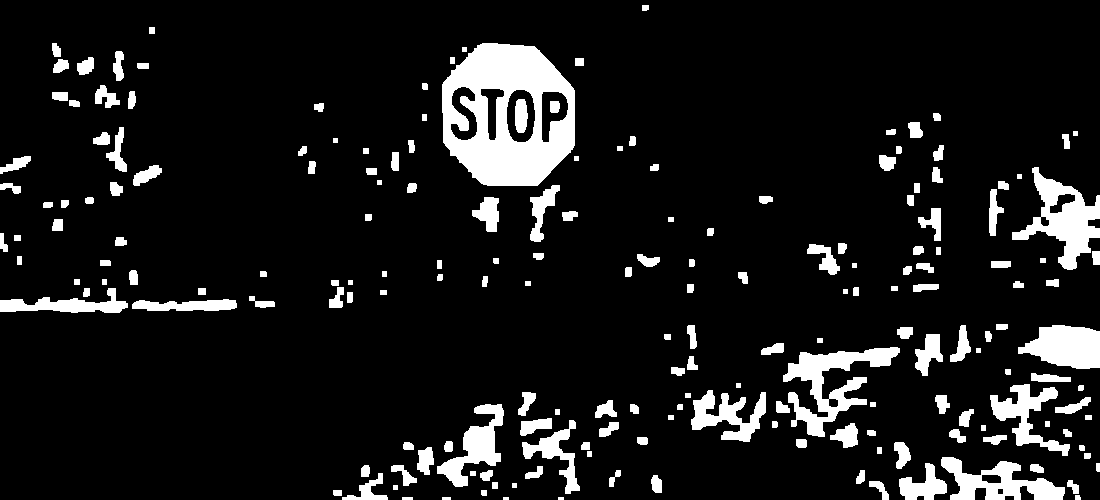

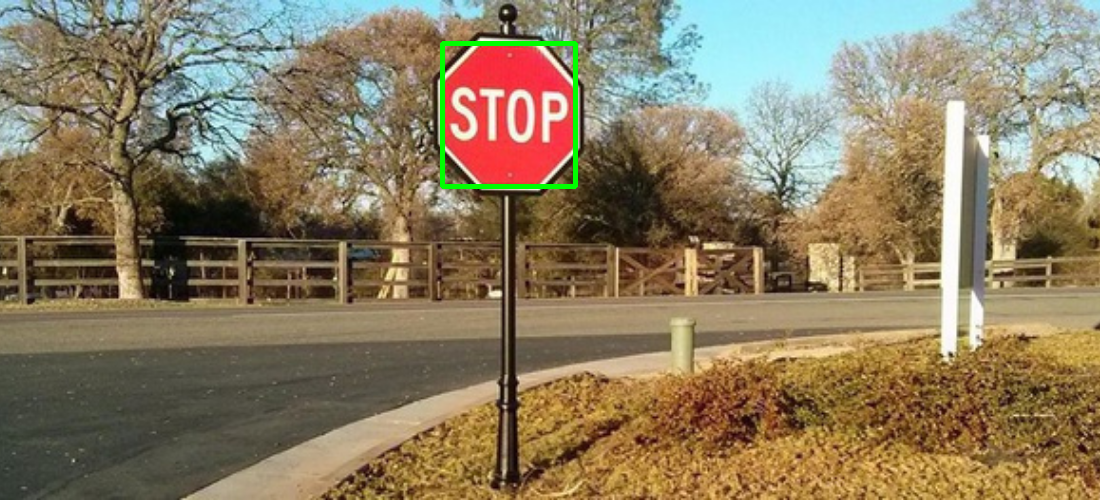

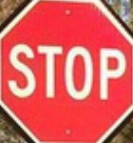

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use for Google Colab

# Load the image
image = cv2.imread("ts1.png")
original = image.copy()  # Keep a copy for later

# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define HSV ranges for common traffic sign colors
# Red has two ranges (lower and upper) due to its presence on both ends of the HSV spectrum
lower_red1 = np.array([0, 100, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 100, 50])
upper_red2 = np.array([180, 255, 255])

# Blue range (for blue signs)
lower_blue = np.array([100, 100, 50])
upper_blue = np.array([140, 255, 255])

# Yellow range (for yellow signs)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([40, 255, 255])

# Create masks for red, blue, and yellow
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = mask_red1 + mask_red2  # Combine both red masks
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Combine all color masks
mask = mask_red + mask_blue + mask_yellow

# Apply morphological operations to remove noise
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Close gaps
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   # Remove noise

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# If contours are found, extract the largest contour (assumed to be the traffic sign)
if contours:
    largest_contour = max(contours, key=cv2.contourArea)  # Get the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)  # Get bounding box

    # Draw bounding box around detected traffic sign
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 255, 0), 3)  # Green box

    # Extract the segmented traffic sign
    segmented_sign = image[y:y+h, x:x+w]

    # Show results
    cv2_imshow(mask)  # Display the color mask
    cv2_imshow(original)  # Display the detected sign with a bounding box
    cv2_imshow(segmented_sign)  # Show the cropped traffic sign

else:
    print("No traffic sign detected!")

